# ANALYSIS OF VARIANCE : ANOVA

- [ONE-WAY ANOVA](#One-Way-ANOVA)
    - [Ex1](#Ex1:-Surgery-Type-&-Recovery-Time-=-Difference-?)
    - [Ex2](#Ex2:-Income-Customers-&-Marital-Status-=-Difference-?)
- [TWO-WAY ANOVA](#Two-Way-ANOVA)
    - [Ex1 (Without Replication)](#Two-Way-ANONVA-without-Replication)
    - [Ex2 (Replication)](#Two-Way-ANONVA-with-Replication)

## Constrains
- Normal distribution
- Variance of each group equal
- Each group must be independent

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import pingouin as pg
#from statsmodels.stats import weightstats as stests
import seaborn as sns
import re

# One-Way ANOVA

## Ex1: Surgery Type & Recovery Time = Difference ?

- $$H_0: \mu_A = \mu_B = \mu_C = \mu_D : No Difference $$ 
- $$H1: \mu_i \neq \mu_j ;(i\neq j) : Difference $$

In [2]:
one_anova = pd.read_excel('One_ANOVA.xlsx', sheet_name='Sheet1')

one_anova = pd.melt(one_anova, 
                    id_vars='วิธีผ่าตัด',
                    value_name='PeriodTime')

one_anova.drop('variable', axis=1, inplace=True)
one_anova['วิธีผ่าตัด'] = one_anova['วิธีผ่าตัด'].map(lambda x: x.replace('ระยะพักฟื้นจากวิธีผ่าตัด ', 'Type '))
one_anova.rename(columns = {'วิธีผ่าตัด': 'Types'}, inplace= True)

one_anova.head()

,Types,PeriodTime
0,Type A,4
1,Type B,2
2,Type C,6
3,Type D,8
4,Type A,7


In [3]:
# descriptive statistic
for i in one_anova['Types'].unique():
    print(f'==============================[{i}]===================================')
    print(one_anova[one_anova['Types'] == i].describe())
    print('\n')

==============================[Type A]===================================
       PeriodTime
count    6.000000
mean     6.500000
std      1.643168
min      4.000000
25%      6.000000
50%      6.500000
75%      7.000000
max      9.000000


==============================[Type B]===================================
       PeriodTime
count    6.000000
mean     3.333333
std      1.032796
min      2.000000
25%      3.000000
50%      3.000000
75%      3.750000
max      5.000000


==============================[Type C]===================================
       PeriodTime
count    6.000000
mean     4.166667
std      1.471960
min      2.000000
25%      3.250000
50%      4.500000
75%      5.000000
max      6.000000


==============================[Type D]===================================
       PeriodTime
count    6.000000
mean     5.166667
std      2.041241
min      2.000000
25%      4.250000
50%      5.500000
75%      6.000000
max      8.000000




### Explore Types of Surgery with Recovery Time

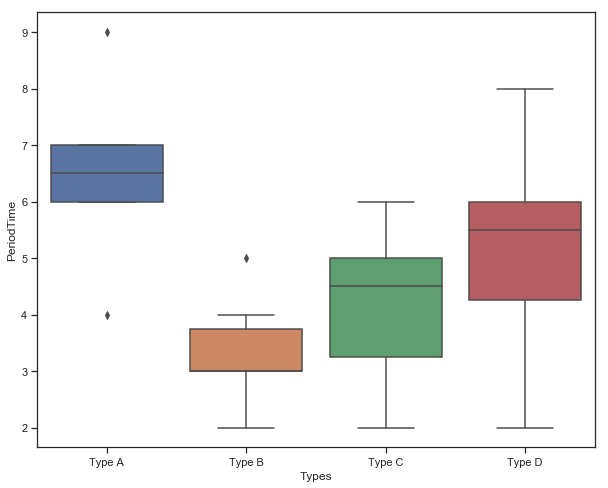

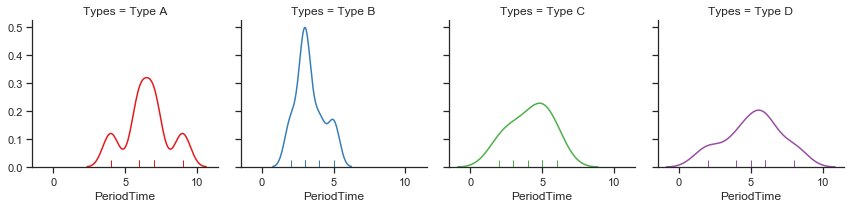

In [4]:
plt.figure(figsize = (10,8))
sns.boxplot(x='Types', y='PeriodTime', data=one_anova);
g = sns.FacetGrid(one_anova, col='Types', hue="Types", palette="Set1")
g = g.map(sns.distplot, "PeriodTime", hist=False, rug=True);

### Check Variance

In [5]:
stats.levene(one_anova[one_anova['Types'] == 'Type A']['PeriodTime'],
             one_anova[one_anova['Types'] == 'Type B']['PeriodTime'],
             one_anova[one_anova['Types'] == 'Type C']['PeriodTime'],
             one_anova[one_anova['Types'] == 'Type D']['PeriodTime'])

LeveneResult(statistic=0.7083333333333335, pvalue=0.5583002166087917)

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
results = ols('PeriodTime ~ C(Types)', data=one_anova).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PeriodTime   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     4.417
Date:                Wed, 24 Jul 2019   Prob (F-statistic):             0.0154
Time:                        19:58:18   Log-Likelihood:                -42.982
No. Observations:                  24   AIC:                             93.96
Df Residuals:                      20   BIC:                             98.68
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5000      0.649     10.020      0.000       5.147       7.853
C(Types)[T.Type B]    -3.1667      0.917     -3.452      0.003      -5.080      -1.253
C(Types)[T.Type C]    -2.3333      0.917     -2.543      0.019      -4.247      -0.420
C(Types)[T.Type D]    -1.3333      0.917     -1.453      0.162      -3.247       0.580
==============================================================================
Omnibus:                        0.196   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.154
Skew:                          -0.156   Prob(JB):                        0.926
Kurtosis:                       2.762   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## One-Way ANOVA

In [8]:
def anova_table(model):
    anova_table = pd.DataFrame(sm.stats.anova_lm(model, typ=2))
    anova_table['F-Crit'] = None
    anova_table.iloc[0, -1] = stats.f.ppf(0.95, anova_table.iloc[0,1], anova_table.iloc[1,1])
    anova_table.index = ['Between Groups', ' Within Groups']
    
    print('========================================================[F-Test]=================================================')
    
    f_value = anova_table.iloc[0,2]
    f_crit = anova_table.iloc[0,-1]
    print(f'F-Test: {f_value}')
    print(f'F-Critical: {f_crit}')
    
    if f_value > f_crit:
        print("Reject Null Hypothesis(H0)")
    else:
        print("Accept Null Hypothesis(H0)")
    
    print('\n')   
    
    
    print('========================================================[P-Value]================================================')
    
    p_value = anova_table.iloc[0,3]
    print(f'P-Value: {p_value}')
    
    if p_value < 0.05:
            print("Reject Null Hypothesis(H0)")
    else:
            print("Accept Null Hypothesis(H0)")
            
    return anova_table

In [9]:
anova_table(results)

========================================================[F-Test]=================================================
F-Test: 4.416941694169424
F-Critical: 3.09839121214078
Reject Null Hypothesis(H0)


========================================================[P-Value]================================================
P-Value: 0.015417685555399966
Reject Null Hypothesis(H0)


,sum_sq,df,F,PR(>F),F-Crit
Between Groups,33.458333,3.0,4.416942,0.015418,3.09839
Within Groups,50.500000,20.0,NaN,NaN,None


### Conclusion
Question : Surgery Type & Recovery Time = Difference ?

- Reject Null Hypothesis(H0) >>> Surgery Type & Recovery Time = Difference (H1)


----

## Ex2: Income Customers & Marital Status = Difference ?

- $$H_0: \mu_A = \mu_B = \mu_C = \mu_D : No Difference $$ 
- $$H1: \mu_i \neq \mu_j ;(i\neq j) : Difference $$

In [10]:
one_anova2 = pd.read_excel('One-Way ANOVA2.xlsx', sheet_name='ตาราง C', skiprows=1)
one_anova2.drop('Unnamed: 0', axis=1 ,inplace=True)
one_anova2 = one_anova2[['salary', 'status']]
one_anova2['status'] = one_anova2['status'].map({'โสด':'Single', 'สมรส':'Marriage', 'แยกกันอยู่':'Separated', 'ม่าย':'Widow'})
one_anova2.head()

,salary,status
0,3000,Single
1,4000,Single
2,87000,Marriage
3,9500,Marriage
4,8000,Marriage


In [11]:
# descriptive statistic
for i in one_anova2['status'].unique():
    print(f'==============================[{i}]===================================')
    print(one_anova2[one_anova2['status'] == i].describe())
    print('\n')

==============================[Single]===================================
             salary
count     29.000000
mean    8855.172414
std     5720.613492
min     2000.000000
25%     5700.000000
50%     8000.000000
75%     9500.000000
max    31000.000000


==============================[Marriage]===================================
             salary
count     55.000000
mean   12281.818182
std    10978.060459
min     7000.000000
25%     8000.000000
50%     9500.000000
75%    14000.000000
max    87000.000000


==============================[Separated]===================================
             salary
count     14.000000
mean   11457.142857
std     4531.040683
min     8000.000000
25%     8625.000000
50%     9800.000000
75%    13750.000000
max    25000.000000


==============================[Widow]===================================
            salary
count     2.000000
mean   8400.000000
std    1979.898987
min    7000.000000
25%    7700.000000
50%    8400.000000
75%    9100.000000
ma

### Explore Status with Salary

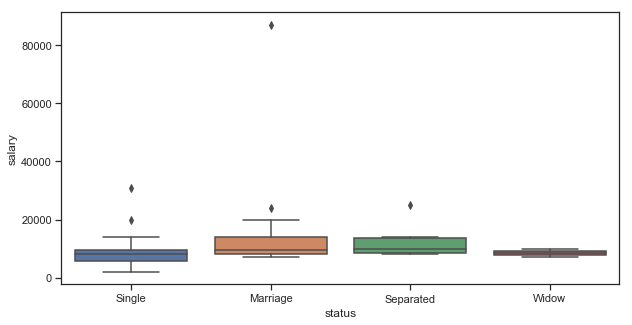

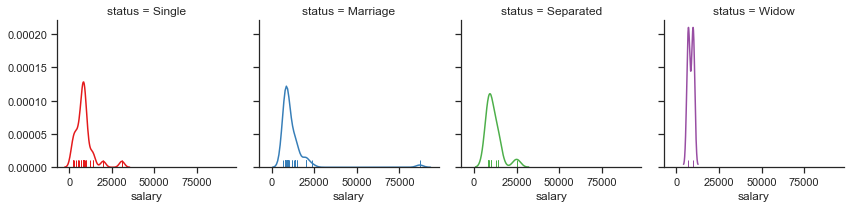

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='status', y='salary', data=one_anova2);
g = sns.FacetGrid(data=one_anova2, col='status', hue='status', palette='Set1')
g = g.map(sns.distplot, 'salary', hist=False, rug=True);

### Check Variance

In [13]:
stats.levene(one_anova2[one_anova2['status'] == 'Single']['salary'],
              one_anova2[one_anova2['status'] == 'Marriage']['salary'],
              one_anova2[one_anova2['status'] == 'Separated']['salary'],
              one_anova2[one_anova2['status'] == 'Widow']['salary'])

LeveneResult(statistic=0.14368326803875991, pvalue=0.9334890819652939)

In [14]:
results2 = ols('salary ~ C(status)', data=one_anova2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9952
Date:                Wed, 24 Jul 2019   Prob (F-statistic):              0.399
Time:                        20:00:20   Log-Likelihood:                -1049.8
No. Observations:                 100   AIC:                             2108.
Df Residuals:                      96   BIC:                             2118.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.228e+04   1207.229     10.174      0.000    9885.487    1.47e+04
C(status)[T.Separated]  -824.6753   2680.096     -0.308      0.759   -6144.624    4495.273
C(status)[T.Single]    -3426.6458   2054.615     -1.668      0.099   -7505.024     651.733
C(status)[T.Widow]     -3881.8182   6444.842     -0.602      0.548   -1.67e+04    8911.092
==============================================================================
Omnibus:                      167.854   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11188.195
Skew:                           6.403   Prob(JB):                         0.00
Kurtosis:                      53.211   Cond. No.                         7.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## One-Way ANOVA

In [15]:
anova_table(results2)

========================================================[F-Test]=================================================
F-Test: 0.9952101488707034
F-Critical: 2.6993925975521815
Accept Null Hypothesis(H0)


========================================================[P-Value]================================================
P-Value: 0.3985603451246772
Accept Null Hypothesis(H0)


,sum_sq,df,F,PR(>F),F-Crit
Between Groups,2.393197e+08,3.0,0.99521,0.39856,2.69939
Within Groups,7.695088e+09,96.0,NaN,NaN,None


### Conclusion
Question : Income Customers & Marital Status = Difference ?

- Accept Null Hypothesis(H0) >>> Income Customers & Marital Status = No Difference ? (H0)


---

# Two-Way ANOVA

# Two-Way ANONVA without Replication

## Ex1:  Income from 5 products & 3 Sources  =  Difference ?

### 1 HYPOTHESIS : Incomes & 3 Sources
- $$ H_0: \mu_1 = \mu_2 = \mu_3 : No Difference $$ 
- $$ H1: \mu_i \neq \mu_j ;(i\neq j) : Difference $$

### 2 HYPOTHESIS : Incomes & 5 Products
- $$ H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5 : No Difference $$ 
- $$ H1: \mu_i \neq \mu_j ;(i\neq j) : Difference $$

In [16]:
two_anova_sing = pd.read_excel('Two-Way ANOVA single.xlsx', sheet_name='Sheet2')
two_anova_sing['Source'] = two_anova_sing['Source'].map({'แหล่งท่องเที่ยว':'landmark',
                                                         'ร้านสะดวกซื้อ':'Convenience Store',
                                                         'ร้านธงฟ้าประชารัฐ':'Thong Fah Pracharath Shop'})
two_anova_sing

,Source,ProductTypes,Value
0,landmark,A,2
1,landmark,B,3
2,landmark,C,4
3,landmark,D,5
4,landmark,E,2
5,Convenience Store,A,3
6,Convenience Store,B,6
7,Convenience Store,C,3
8,Convenience Store,D,5
9,Convenience Store,E,3


### Explore Sources

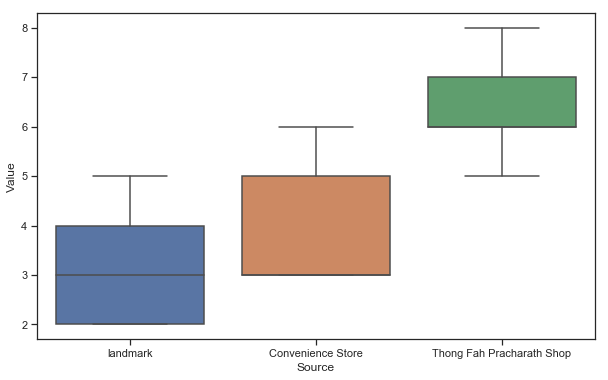

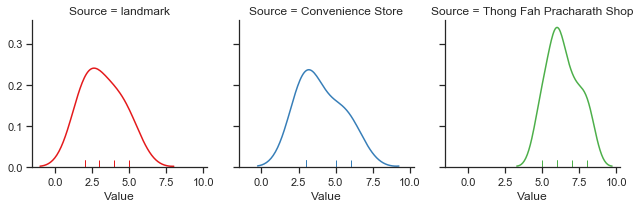

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Value', data=two_anova_sing)
g = sns.FacetGrid(data=two_anova_sing, col='Source', hue='Source', palette='Set1');
g = g.map(sns.distplot, 'Value', hist=False, rug=True);

### Explore Product Types

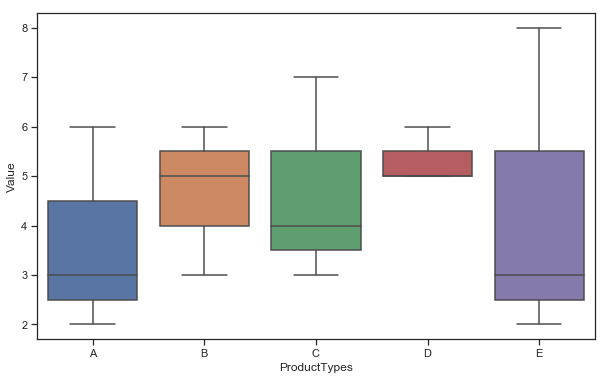

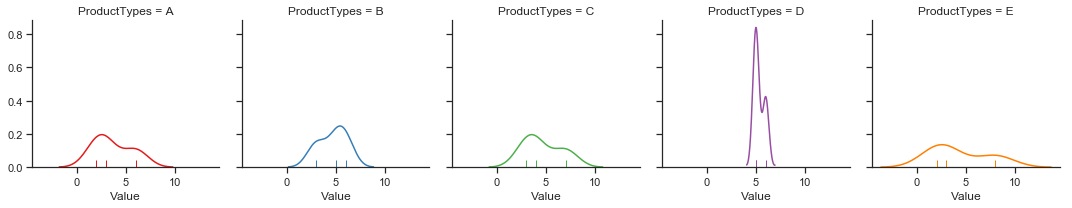

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ProductTypes', y='Value', data=two_anova_sing)
g = sns.FacetGrid(data=two_anova_sing, col='ProductTypes', hue='ProductTypes', palette='Set1');
g = g.map(sns.distplot, 'Value', hist=False, rug=True);

In [19]:
results3 = ols('Value ~ C(Source)+ C(ProductTypes)', data=two_anova_sing).fit()
results3.summary()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     2.746
Date:                Wed, 24 Jul 2019   Prob (F-statistic):             0.0938
Time:                        20:00:37   Log-Likelihood:                -21.578
No. Observations:                  15   AIC:                             57.16
Df Residuals:                       8   BIC:                             62.11
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  3.1333      0.954      3.285      0.011       0.934       5.333
C(Source)[T.Thong Fah Pracharath Shop]     2.4000      0.883      2.717      0.026       0.363       4.437
C(Source)[T.landmark]                     -0.8000      0.883     -0.906      0.391      -2.837       1.237
C(ProductTypes)[T.B]                       1.0000      1.140      0.877      0.406      -1.629       3.629
C(ProductTypes)[T.C]                       1.0000      1.140      0.877      0.406      -1.629       3.629
C(ProductTypes)[T.D]                       1.6667      1.140      1.462      0.182      -0.963       4.296
C(ProductTypes)[T.E]                       0.6667      1.140      0.585      0.575      -1.963       3.296
==============================================================================
Omnibus:                        0.817   Durbin-Watson:                   2.758
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.764
Skew:                           0.344   Prob(JB):                        0.682
Kurtosis:                       2.134   Cond. No.                         6.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
def two_anova_table(model):
    
    two_anova_table = pd.DataFrame(sm.stats.anova_lm(model, typ=2))
    two_anova_table['F-Crit'] = None
    two_anova_table.iloc[0, -1] = stats.f.ppf(0.95, two_anova_table.iloc[0,1], two_anova_table.iloc[2,1])
    two_anova_table.iloc[1, -1] = stats.f.ppf(0.95, two_anova_table.iloc[1,1], two_anova_table.iloc[2,1])    

    i = 0
    while i < two_anova_table.shape[0]-1:
        
        text_name = re.sub(r'[(.*?)]', '', two_anova_table.index.values[i])
        text_name = re.sub(r'C', '', text_name)
        
        print(f'=======================================================[{text_name}]============================================')
        print('========================================================[F-Test]=================================================')

        f_value = two_anova_table.iloc[i, 2]
        f_crit = two_anova_table.iloc[i, -1]
        print(f'F-Test: {f_value}')
        print(f'F-Critical: {f_crit}')

        if f_value > f_crit:
            print("Reject Null Hypothesis(H0)")
        else:
            print("Accept Null Hypothesis(H0)")


        print('========================================================[P-Value]================================================')

        p_value = two_anova_table.iloc[i, 3]
        print(f'P-Value: {p_value}')

        if p_value < 0.05:
                print("Reject Null Hypothesis(H0)")
        else:
                print("Accept Null Hypothesis(H0)")
                
        print('\n')
        
        i+=1                      
            
    return two_anova_table

In [21]:
two_anova_table(results3)

=======================================================[Source]============================================
========================================================[F-Test]=================================================
F-Test: 7.111111111111113
F-Critical: 4.458970107524511
Reject Null Hypothesis(H0)
========================================================[P-Value]================================================
P-Value: 0.016796159999999977
Reject Null Hypothesis(H0)


=======================================================[ProductTypes]============================================
========================================================[F-Test]=================================================
F-Test: 0.5641025641025621
F-Critical: 3.837853354555897
Accept Null Hypothesis(H0)
========================================================[P-Value]================================================
P-Value: 0.6958830528000013
Accept Null Hypothesis(H0)




,sum_sq,df,F,PR(>F),F-Crit
C(Source),27.733333,2.0,7.111111,0.016796,4.45897
C(ProductTypes),4.400000,4.0,0.564103,0.695883,3.83785
Residual,15.600000,8.0,NaN,NaN,None


### Conclusion
Question : Income from 5 products & 3 Sources = Difference ?

#### 1 HYPOTHESIS : Incomes & 3 Sources
- Reject Null Hypothesis(H0) >>> Incomes & 3 Sources = Difference (H1)

#### 2 HYPOTHESIS : Incomes & 5 Products
- Accept Null Hypothesis(H0) >>> Incomes & 5 Products = No Difference (H0)


----

# Two-Way ANONVA with Replication

## Ex2: Satisfaction scores of 3 OS of 3 Groups = Difference ?

### 1 HYPOTHESIS : Satisfaction scores & 3 Groups
- $$ H_0: \mu_1 = \mu_2 = \mu_3 : No Difference $$ 
- $$ H1: \mu_i \neq \mu_j ;(i\neq j) : Difference $$

### 2 HYPOTHESIS : Satisfaction scores & 3 OS
- $$ H_0: \mu_1 = \mu_2 = \mu_3 : No Difference $$ 
- $$ H1: \mu_i \neq \mu_j ;(i\neq j) : Difference $$

### 3 HYPOTHESIS : Satisfaction scores & 3 Groups, 3 OS  (Relationship)
- $$ H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5 : Independent $$ 
- $$ H1: \mu_i \neq \mu_j ;(i\neq j) : Dependent $$

In [22]:
two_anova_rep = pd.read_excel('Two-Way ANOVA rep.xlsx', sheet_name='Sheet2')

# Sort Vulues
two_anova_rep.sort_values(by=['Groups', 'OS'], inplace=True)
two_anova_rep['Id'] = two_anova_rep.groupby(['OS', 'Groups']).cumcount()+1

# Move Columns
two_anova_rep = two_anova_rep[[two_anova_rep.columns[0]] + [two_anova_rep.columns[-1]] + list(two_anova_rep.columns[1:3])]

two_anova_rep.reset_index(inplace=True, drop=True)

print(two_anova_rep.shape)
two_anova_rep.head()

(36, 4)


,Groups,Id,OS,Value
0,Group A,1,Dos,9
1,Group A,2,Dos,13
2,Group A,3,Dos,16
3,Group A,4,Dos,14
4,Group A,1,Macintosh,19


### Explore Groups

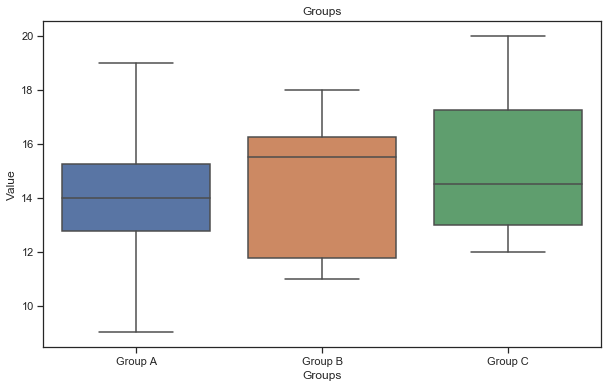

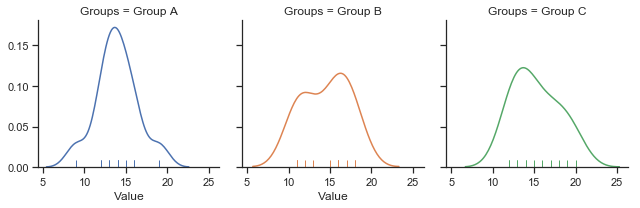

In [23]:
plt.figure(figsize=(10,6))
plt.title('Groups')
sns.boxplot(data=two_anova_rep, x='Groups', y='Value')
g = sns.FacetGrid(data=two_anova_rep, col='Groups', hue='Groups')
g = g.map(sns.distplot, 'Value',hist=False, rug=True)
plt.xlabel('');

### Explore OS

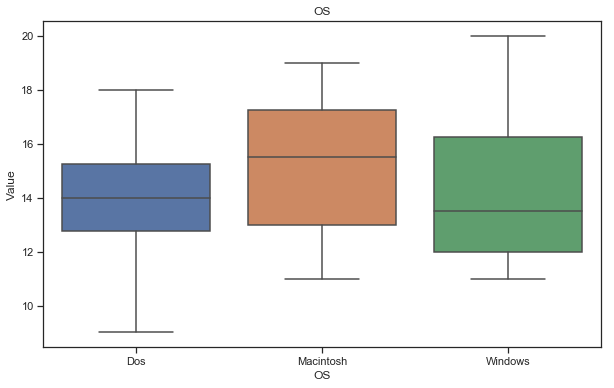

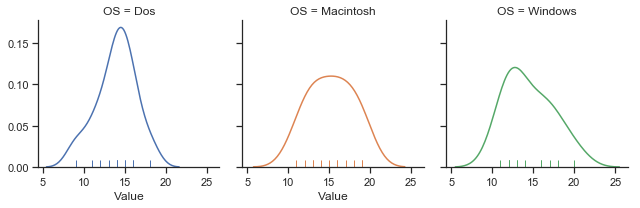

In [24]:
plt.figure(figsize=(10,6))
plt.title('OS')
sns.boxplot(data=two_anova_rep, x='OS', y='Value')
g = sns.FacetGrid(data=two_anova_rep, col='OS', hue='OS')
g = g.map(sns.distplot, 'Value',hist=False, rug=True)
plt.xlabel('');

### Compare Groups & OS 

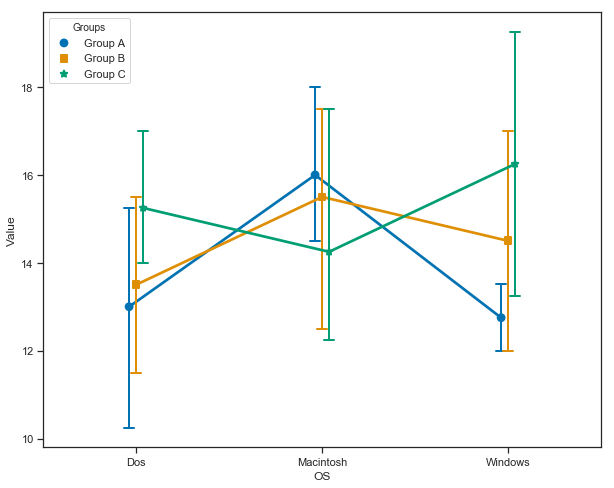

In [25]:
plt.figure(figsize=(10, 8))
sns.pointplot(data=two_anova_rep, x='OS', y='Value', hue='Groups', dodge=True, markers=['o', 's', '*'],
              capsize=.05, errwidth=2, palette='colorblind');

In [26]:
results4 = ols('Value ~ C(OS)+ C(Groups)', data=two_anova_rep).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.7438
Date:                Wed, 24 Jul 2019   Prob (F-statistic):              0.570
Time:                        20:01:03   Log-Likelihood:                -83.943
No. Observations:                  36   AIC:                             177.9
Df Residuals:                      31   BIC:                             185.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               13.2778      1.001     13.271      0.000      11.237      15.318
C(OS)[T.Macintosh]       1.3333      1.096      1.216      0.233      -0.902       3.569
C(OS)[T.Windows]         0.5833      1.096      0.532      0.598      -1.652       2.819
C(Groups)[T.Group B]     0.5833      1.096      0.532      0.598      -1.652       2.819
C(Groups)[T.Group C]     1.3333      1.096      1.216      0.233      -0.902       3.569
==============================================================================
Omnibus:                        2.625   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                1.351
Skew:                          -0.007   Prob(JB):                        0.509
Kurtosis:                       2.051   Cond. No.                         4.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
def two_anova_rep_table(model, data, dv, within, subject):

    two_anova_rep_table = pd.DataFrame(sm.stats.anova_lm(model, typ=1))
    two_anova_rep_table['F-Crit'] = None
    two_anova_rep_table.drop(two_anova_rep_table.index[-1], inplace=True)
    
    # get interaction value from pingouin lib 
    interaction = pg.rm_anova(dv=dv,
                              within=within,
                              subject=subject,
                              data=data)    
    # Handle columns
    intera_values = interaction.iloc[interaction.index[-1], [0, 2, 1 ,4 ,5, 6]]
    intera_values.index = ['Source','df', 'sum_sq', 'mean_sq', 'F', 'PR(>F)']

    # add interaction value to main table
    two_anova_rep_table = two_anova_rep_table.append(intera_values)
    two_anova_rep_table.reset_index(inplace=True)    
    two_anova_rep_table.iloc[-1,0] = two_anova_rep_table.iloc[-1,-1]
    two_anova_rep_table.drop(two_anova_rep_table.columns[-1], axis=1, inplace=True)
    two_anova_rep_table.set_index('index', inplace=True, drop=True)
    two_anova_rep_table.index.name = ''
    
    # find degree of freedom
    dof_within = (data.shape[0]-1) - two_anova_rep_table.sum(axis=0)[0]    
    two_anova_rep_table.iloc[0, -1] = stats.f.ppf(0.95, two_anova_rep_table.iloc[0,0], dof_within)
    two_anova_rep_table.iloc[1, -1] = stats.f.ppf(0.95, two_anova_rep_table.iloc[1,0], dof_within)
    two_anova_rep_table.iloc[2, -1] = stats.f.ppf(0.95, two_anova_rep_table.iloc[2,0], dof_within)

    
    i = 0
    while i < two_anova_rep_table.shape[0]:
        
        text_name = re.sub(r'[(.*?)]', '', two_anova_rep_table.index.values[i])
        text_name = re.sub(r'C', '', text_name)
        
        print(f'=======================================================[{text_name}]============================================')
        print('========================================================[F-Test]=================================================')

        f_value = two_anova_rep_table.iloc[i, 3]
        f_crit = two_anova_rep_table.iloc[i, -1]
        print(f'F-Test: {f_value}')
        print(f'F-Critical: {f_crit}')

        if f_value > f_crit:
            print("Reject Null Hypothesis(H0)")
        else:
            print("Accept Null Hypothesis(H0)")


        print('========================================================[P-Value]================================================')

        p_value = two_anova_rep_table.iloc[i, 4]
        print(f'P-Value: {p_value}')

        if p_value < 0.05:
                print("Reject Null Hypothesis(H0)")
        else:
                print("Accept Null Hypothesis(H0)")
                
        print('\n')
        
        i+=1                      
            
    return two_anova_rep_table

In [29]:
two_anova_rep_table(results4, data=two_anova_rep, dv='Value', within=['Groups', 'OS'], subject='Id')

=======================================================[OS]============================================
========================================================[F-Test]=================================================
F-Test: 0.7437841869716536
F-Critical: 3.3541308285291986
Accept Null Hypothesis(H0)
========================================================[P-Value]================================================
P-Value: 0.48360363119166894
Accept Null Hypothesis(H0)


=======================================================[Groups]============================================
========================================================[F-Test]=================================================
F-Test: 0.7437841869716569
F-Critical: 3.3541308285291986
Accept Null Hypothesis(H0)
========================================================[P-Value]================================================
P-Value: 0.48360363119166716
Accept Null Hypothesis(H0)


==============================================

,df,sum_sq,mean_sq,F,PR(>F),F-Crit
,,,,,,
C(OS),2.0,10.722222,5.361111,0.743784,0.483604,3.35413
C(Groups),2.0,10.722222,5.361111,0.743784,0.483604,3.35413
Groups * OS,4.0,31.444000,7.861000,1.254000,0.340556,2.72777


### Conclusion
Question : Satisfaction scores of 3 OS of 3 Groups = Difference ?

#### 3 HYPOTHESIS : Satisfaction scores & 3 Groups, 3 OS (Relationship)
- Accept Null Hypothesis(H0) >>> Satisfaction scores & 3 Groups, 3 OS = Independent (H0)

#### 1 HYPOTHESIS : Satisfaction scores & 3 Groups
- Accept Null Hypothesis(H0) >>> Satisfaction scores & 3 Groups = No Difference (H0)

#### 2 HYPOTHESIS : Satisfaction scores & 3 OS
- Accept Null Hypothesis(H0) >>> Satisfaction scores & 3 OS = No Difference (H0)



---